In [52]:
import numpy as np
seed = 42
np.random.seed(seed)
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,balanced_accuracy_score
from sklearn.model_selection import PredefinedSplit,GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
# import yolo outputs DONE
# import mobilenet outputs DONE
# import densenet outputs 

In [8]:
b_mobilenet_train = pd.read_csv("/kaggle/input/fork-of-koa-mobilenetv2-2/b_mobilenet_train.csv").drop(columns=['Unnamed: 0'])
b_mobilenet_val = pd.read_csv("/kaggle/input/fork-of-koa-mobilenetv2-2/b_mobilenet_val.csv").drop(columns=['Unnamed: 0'])
b_mobilenet_test = pd.read_csv("/kaggle/input/fork-of-koa-mobilenetv2-2/b_mobilenet_test.csv").drop(columns=['Unnamed: 0'])

In [9]:
b_mobilenet_train.rename(columns = {'FileName': 'FilePath'}, inplace=True)
b_mobilenet_val.rename(columns = {'FileName': 'FilePath'}, inplace=True)
b_mobilenet_test.rename(columns = {'FileName': 'FilePath'}, inplace=True)

In [10]:
b_yolov8_train = pd.read_csv("/kaggle/input/koa-yolov8-preds/b_yolov8_train.csv").drop(columns=['Unnamed: 0'])
b_yolov8_val = pd.read_csv("/kaggle/input/koa-yolov8-preds/b_yolov8_val.csv").drop(columns=['Unnamed: 0'])
b_yolov8_test = pd.read_csv("/kaggle/input/koa-yolov8-preds/b_yolov8_test.csv").drop(columns=['Unnamed: 0'])

In [11]:
b_densenet_train = pd.read_csv("/kaggle/input/koa-densenet-preds/b_densenet_train.csv").drop(columns=['Unnamed: 0'])
b_densenet_val = pd.read_csv("/kaggle/input/koa-densenet-preds/b_densenet_val.csv").drop(columns=['Unnamed: 0'])
b_densenet_test = pd.read_csv("/kaggle/input/koa-densenet-preds/b_densenet_test.csv").drop(columns=['Unnamed: 0'])

In [12]:
b_densenet_train.rename(columns = {'FileName': 'FilePath'}, inplace=True)
b_densenet_val.rename(columns = {'FileName': 'FilePath'}, inplace=True)
b_densenet_test.rename(columns = {'FileName': 'FilePath'}, inplace=True)

In [13]:
train = (b_mobilenet_train.merge(b_yolov8_train)).merge(b_densenet_train)
val = b_mobilenet_val.merge(b_yolov8_val).merge(b_densenet_val)
test = b_mobilenet_test.merge(b_yolov8_test).merge(b_densenet_test)

In [14]:
X_train = train[['m','m_0','d']]
X_val = val[['m','m_0','d']]
X_test = test[['m','m_0','d']]
y_train = train[['y_true']]
y_val = val[['y_true']]
y_test = test[['y_true']]

In [15]:
knn = KNeighborsClassifier()

In [16]:
split_index = [-1]*len(X_train) + [0]*len(X_val)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0).ravel()
pds = PredefinedSplit(test_fold = split_index)

In [18]:
param_grid = {'n_neighbors': np.arange(1, 7)}

In [20]:
knn_gscv = GridSearchCV(estimator = knn, param_grid = param_grid, cv=pds,n_jobs = -1)

In [21]:
#fit model to data
knn_gscv.fit(X,y)


GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6])})

In [22]:
knn_gscv.best_estimator_

KNeighborsClassifier(n_neighbors=4)

In [23]:
k_values = [i for i in range (1,10)]
scores = []
scores1 = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X,y)
    score = accuracy_score(y_val,knn.predict(X_val))
    score1 = accuracy_score(y_test,knn.predict(X_test))
    scores.append(score)
    scores1.append(score1)

Text(0, 0.5, 'Accuracy')

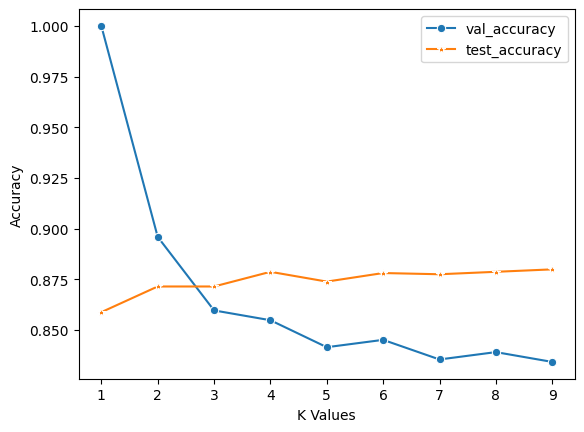

In [53]:
sns.lineplot(x = k_values, y = scores, marker = 'o',label = 'val_accuracy')
sns.lineplot(x = k_values, y = scores1, marker = '*',label = 'test_accuracy')
plt.xlabel("K Values")
plt.ylabel("Accuracy")

In [25]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [26]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=4)

In [60]:
print("Testing on training set:")
print("Accuracy: ", accuracy_score(y_train,knn.predict(X_train)).round(3))
print("Balanced Accuracy: ",balanced_accuracy_score(y_train,knn.predict(X_train)).round(3))
print("AUC:", roc_auc_score(y_train.to_numpy(),knn.predict_proba(X_train)[:,1]).round(3))

Testing on training set:
Accuracy:  0.959
Balanced Accuracy:  0.954
AUC: 0.995


In [61]:
print("Testing on validation set:")
print("Accuracy: ", accuracy_score(y_val,knn.predict(X_val)).round(3))
print("Balanced Accuracy: ",balanced_accuracy_score(y_val,knn.predict(X_val)).round(3))
print("AUC:", roc_auc_score(y_val,knn.predict_proba(X_val)[:,1]).round(3))

Testing on validation set:
Accuracy:  0.855
Balanced Accuracy:  0.843
AUC: 0.953


In [62]:
print("Testing on testing set:")
print("Accuracy: ", accuracy_score(y_test,knn.predict(X_test)).round(3))
print("Balanced Accuracy: ",balanced_accuracy_score(y_test,knn.predict(X_test)).round(3))
print("AUC:", roc_auc_score(y_test,knn.predict_proba(X_test)[:,1]).round(3))

Testing on testing set:
Accuracy:  0.879
Balanced Accuracy:  0.871
AUC: 0.913
